# Исследование надёжности заёмщиков

**Описание:**

Заказчик — кредитный отдел банка. Необходимо выяснить, влияет ли уровень дохода, семейное положение и количество детей клиента на факт погашения кредита в срок. Установить как цели взятия кредита влияют на срок его погашения. Входные данные от банка — статистика о платёжеспособности клиентов. Результаты исследования будут использовани при построении модели кредитного скоринга.

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Настройка-окружения" data-toc-modified-id="Настройка-окружения-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Настройка окружения</a></span></li><li><span><a href="#Предварительный-обзор-данных" data-toc-modified-id="Предварительный-обзор-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предварительный обзор данных</a></span></li><li><span><a href="#Обработка-и-категоризация-данных" data-toc-modified-id="Обработка-и-категоризация-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обработка и категоризация данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Замена-типа-данных" data-toc-modified-id="Замена-типа-данных-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Замена типа данных</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li><li><span><a href="#Выявление-основных-целей-получения-кредитов-при-помощи-лемматизации" data-toc-modified-id="Выявление-основных-целей-получения-кредитов-при-помощи-лемматизации-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Выявление основных целей получения кредитов при помощи лемматизации</a></span></li><li><span><a href="#Категоризация-данных" data-toc-modified-id="Категоризация-данных-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Категоризация данных</a></span></li></ul></li><li><span><a href="#Исследование-надежности-заемщиков" data-toc-modified-id="Исследование-надежности-заемщиков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследование надежности заемщиков</a></span></li><li><span><a href="#Общий-вывод-исследования" data-toc-modified-id="Общий-вывод-исследования-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод исследования</a></span></li></ul></div>

## Настройка окружения

In [180]:
import pandas as pd
import numpy as np

# библиотеки для лемматизации данных
from pymystem3 import Mystem
from collections import Counter

## Предварительный обзор данных

In [181]:
df = pd.read_csv('/datasets/data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


'education','education_id', 'family_status','family_status_id', 'gender', 'income_type', 'purpose' - категориальные переменные

В количественных переменных 'days_employed' и 'total_income' есть пропуски

In [182]:
df.head(30)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [183]:
print('Кол-во явных дубликатов в таблице:', df.duplicated().sum())

Кол-во явных дубликатов в таблице: 54


**Вывод**
1. В таблице есть явные и неявные дубликаты.
2. В таблице присутствуют пропуски.


## Обработка и категоризация данных

Для начала я изучу некоторые переменные и устраню ошибки в данных

**children — количество детей в семье**

In [184]:
df['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

Вероятно, что вместо 20 детей имелось ввиду 2, т.к. на некоторых клавиатурах клавиши 2 и 0 расположены близко. Под -1 вероятнее всего подразумевается 0 детей. Подозреваю, что это особенность выгрузки данных из некоторой системы.

In [185]:
df['children']=df['children'].replace(20,2)
df['children']=df['children'].replace(-1,0)
#Проверка
df['children'].value_counts()

0    14196
1     4818
2     2131
3      330
4       41
5        9
Name: children, dtype: int64


**days_employed — общий трудовой стаж в дня**


Изначально я заметил две особенности в данных, которые меня насторожили:
1) Присутствуют, как положительные, так и отрицательные данные. Эту проблему надо устранить, взяв все отрицательные значения по модулю.

2) Некоторые значения отличаются друг от друга на порядки, что говорит о разном формате заполнения (дни/часы). Из гистограммы видно, что некоторая часть данных указана в формате часов, но большая часть данных указана в формате дней.Часы надо перевести в дни.

Источником этих проблем может быть особенность выгрузки данных из некоторой системы.

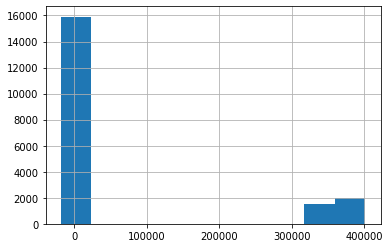

In [186]:
df['days_employed'].hist();

In [187]:
# Беру все значения по модулю
df['days_employed'] = df['days_employed'].apply(abs)
# Перевожу все значения трудового стажа в формат дней. 
# Из гистограммы выше видно, что пороговым значением для сравнения можно взять 300000
df.loc[df['days_employed'] > 300000,'days_employed'] = df.loc[df['days_employed'] > 300000,'days_employed']/24

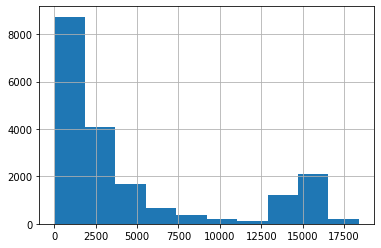

In [188]:
# Проверка
df['days_employed'].hist();

### Обработка пропусков

In [189]:
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**dob_years — возраст клиента в годах**


Метод isna() отображает только NaN и None значения. Но для переменной 'dob_years' значение 0 тоже можно считать пропуском.

In [190]:
df['dob_years'].unique()

array([42, 36, 33, 32, 53, 27, 43, 50, 35, 41, 40, 65, 54, 56, 26, 48, 24,
       21, 57, 67, 28, 63, 62, 47, 34, 68, 25, 31, 30, 20, 49, 37, 45, 61,
       64, 44, 52, 46, 23, 38, 39, 51,  0, 59, 29, 60, 55, 58, 71, 22, 73,
       66, 69, 19, 72, 70, 74, 75])

In [191]:
df['dob_years'][df['dob_years']== 0].count()

101

По всей видимости клиентам с неизвестным возрастом присваивалось зн-ие 0 и такое встречается 101 раз.

Нулевые значения в dob_years заменю медианными значениями dob_years, взятыми по группам в соответствии с параметром children. 
На мой взгляд, возраст клиента (dob_years) и количество его детей (children) коррелирующие параметры.

In [192]:
for children in df['children'].unique():
    median = df.loc[ ( df['children'] == children ) & ( df['dob_years'] != 0 ), 'dob_years'].median() 
    # условие df['dob_years'] != 0 для того, чтобы не портить медианное значение нулевыми элементами
    df.loc[ ( df['dob_years'] == 0 ) & ( df['children'] == children ), 'dob_years'] = median

In [193]:
#Проверка
df['dob_years'][df['dob_years']== 0].count()

0


**days_employed — общий трудовой стаж в днях**


Пропущенные значения в days_employed заменю медианными значенями days_employed , взятыми по группам в соответствии с параметром dob_years. На мой взгляд, трудовой стаж (days_employed) и возраст клиента (dob_years) коррелирующие параметры.


In [194]:
for dob_years in df['dob_years'].unique():
    median = df.loc[df['dob_years'] == dob_years, 'days_employed'].median()
    df.loc[ ( df['days_employed'].isna() ) & ( df['dob_years'] == dob_years ), 'days_employed'] = median


**total_income — ежемесячный доход**


Пропущенные значения в total_income заменю медианными значенями total_income, взятыми по группам в соответствии с параметром income_type. На мой взгляд, ежемесячный доход (total_income) и тип занятости (income_type) коррелирующие параметры. 


In [195]:
for income_type in df['income_type'].unique():
    median = df.loc[df['income_type'] == income_type,'total_income'].median()
    df.loc[ ( df['total_income'].isna() ) & ( df['income_type'] == income_type ),'total_income'] = median  

In [196]:
#Проверка замены пустых значений:
df.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

**Вывод**

Явные и неявные пропуски в данных были устранены

### Замена типа данных

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21525 non-null  float64
 2   dob_years         21525 non-null  float64
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 2.0+ MB


Для значений переменной days_employed желательно изменить тип данных на int, т.к. количество дней подразумевает целое число. Для этого я буду использовать метод .astype()

In [198]:
df['days_employed'] = df['days_employed'].astype('int')

### Обработка дубликатов

**Поиск и удаление явных дубликатов**

Для удаления явных дубликатов я буду использовать метод drop_duplicates().reset_index(drop = True) и обновлять значение индекса, удаляя предыдущее индексирование. Объединение одинаковых данных, взятых из разных систем может быть причиной возникновения дубликатов.

In [199]:
print('Кол-во явных дубликатов в таблице до удаления:')
print(df.duplicated().sum())
df = df.drop_duplicates().reset_index(drop = True)
print('Кол-во явных дубликатов в таблице после удаления:')
print(df.duplicated().sum())

Кол-во явных дубликатов в таблице до удаления:
54
Кол-во явных дубликатов в таблице после удаления:
0


**Поиск и удаление неявных дубликатов**


**education — уровень образования клиента**


In [200]:
print('Кол-во уникальных значений в категориальной переменной education до удаления явных дубликатов:')
print(df['education'].value_counts())

Кол-во уникальных значений в категориальной переменной education до удаления явных дубликатов:
среднее                13705
высшее                  4710
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   273
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
УЧЕНАЯ СТЕПЕНЬ             1
Ученая степень             1
Name: education, dtype: int64


Для того, чтобы избавится от неявных дубликатов, я приведу все значения переменной 'education' к нижнему регистру, воспользовавшись методом .str.lower()

In [201]:
df['education'] = df['education'].str.lower()
print('Кол-во уникальных значений в категориальной переменной education  после удаления явных дубликатов:')
print(df['education'].value_counts())

Кол-во уникальных значений в категориальной переменной education  после удаления явных дубликатов:
среднее                15188
высшее                  5251
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64


После приведения всех значений к нижнему регистру нужно проверить явные дубликаты еще раз.

In [202]:
print('Кол-во явных дубликатов в таблице до удаления:')
print(df.duplicated().sum())
df = df.drop_duplicates().reset_index(drop = True)
print('Кол-во явных дубликатов в таблице после удаления:')
print(df.duplicated().sum())

Кол-во явных дубликатов в таблице до удаления:
17
Кол-во явных дубликатов в таблице после удаления:
0



**gender — пол клиента**


In [203]:
print('Кол-во уникальных значений в категориальной переменной gender:')
print(df['gender'].value_counts())

Кол-во уникальных значений в категориальной переменной gender:
F      14174
M       7279
XNA        1
Name: gender, dtype: int64


 Найден артефакт 'XNA'. Думаю, можно избавиться, чтобы не портить картину исследования.

In [204]:
df = df.loc[df['gender'] != 'XNA']
print('Кол-во уникальных значений в категориальной переменной gender после удаления \'XNA\':')
print(df['gender'].value_counts())

Кол-во уникальных значений в категориальной переменной gender после удаления 'XNA':
F    14174
M     7279
Name: gender, dtype: int64


**Вывод**

Явные и неявные дубликаты найдены и устранены.

### Выявление основных целей получения кредитов при помощи лемматизации

**purpose — цель получения кредита**

In [205]:
print('Кол-во уникальных значений в категориальной переменной purpose:')
print(df['purpose'].value_counts())

Кол-во уникальных значений в категориальной переменной purpose:
свадьба                                   791
на проведение свадьбы                     768
сыграть свадьбу                           765
операции с недвижимостью                  675
покупка коммерческой недвижимости         661
операции с жильем                         652
покупка жилья для сдачи                   651
операции с коммерческой недвижимостью     650
жилье                                     646
покупка жилья                             646
покупка жилья для семьи                   638
строительство собственной недвижимости    635
недвижимость                              633
операции со своей недвижимостью           627
строительство жилой недвижимости          624
покупка своего жилья                      620
покупка недвижимости                      620
строительство недвижимости                619
ремонт жилью                              607
покупка жилой недвижимости                606
на покупку своег

Для начала необходимо получить уникальные значени переменной 'purpose', склеить их в одну строку и лемматизировать

In [206]:
m = Mystem()
purp_str = ' '.join(df['purpose'].unique())
#print(purp_str)
lemmas = m.lemmatize(purp_str)
print(lemmas)

['покупка', ' ', 'жилье', ' ', 'приобретение', ' ', 'автомобиль', ' ', 'дополнительный', ' ', 'образование', ' ', 'сыграть', ' ', 'свадьба', ' ', 'операция', ' ', 'с', ' ', 'жилье', ' ', 'образование', ' ', 'на', ' ', 'проведение', ' ', 'свадьба', ' ', 'покупка', ' ', 'жилье', ' ', 'для', ' ', 'семья', ' ', 'покупка', ' ', 'недвижимость', ' ', 'покупка', ' ', 'коммерческий', ' ', 'недвижимость', ' ', 'покупка', ' ', 'жилой', ' ', 'недвижимость', ' ', 'строительство', ' ', 'собственный', ' ', 'недвижимость', ' ', 'недвижимость', ' ', 'строительство', ' ', 'недвижимость', ' ', 'на', ' ', 'покупка', ' ', 'подержать', ' ', 'автомобиль', ' ', 'на', ' ', 'покупка', ' ', 'свой', ' ', 'автомобиль', ' ', 'операция', ' ', 'с', ' ', 'коммерческий', ' ', 'недвижимость', ' ', 'строительство', ' ', 'жилой', ' ', 'недвижимость', ' ', 'жилье', ' ', 'операция', ' ', 'со', ' ', 'свой', ' ', 'недвижимость', ' ', 'автомобиль', ' ', 'заниматься', ' ', 'образование', ' ', 'сделка', ' ', 'с', ' ', 'подержать

Теперь необходимо посчитать частоту появления слов и выделить из этого списка самые частые существительные - это будут основные категории. 

In [207]:
print(Counter(lemmas)) 
category_list = ['недвижимость','автомобиль','образование','жилье','операция','свадьба','строительство']

Counter({' ': 96, 'покупка': 10, 'недвижимость': 10, 'автомобиль': 9, 'образование': 9, 'жилье': 7, 'с': 5, 'операция': 4, 'на': 4, 'свой': 4, 'свадьба': 3, 'строительство': 3, 'получение': 3, 'высокий': 3, 'дополнительный': 2, 'для': 2, 'коммерческий': 2, 'жилой': 2, 'подержать': 2, 'заниматься': 2, 'сделка': 2, 'приобретение': 1, 'сыграть': 1, 'проведение': 1, 'семья': 1, 'собственный': 1, 'со': 1, 'профильный': 1, 'сдача': 1, 'ремонт': 1, '\n': 1})


Далее следует написать функцию для apply, которая будет лемматизировать последовательно каждую ячейку столбца purpose и проверять, какая из категорий обнаруживается в лемматизированном варианте

In [208]:
def purpose_category(purpose):
    for category in category_list:
        # m.lemmatize(purpose) объект типа list и в нем можно искать совпадение с помощь in
        if category in m.lemmatize(purpose): 
            return category
    # В случае, если значение не вошло в категории category_list,
    # будет присвоено новое значение 'прочее' 
    return 'прочее' 

In [209]:
# таблица до преобразования
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42.0,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024,36.0,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623,33.0,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124,32.0,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,14177,53.0,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [210]:
df['purpose'] = df['purpose'].apply(purpose_category)

In [211]:
# таблица после преобразования
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42.0,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,жилье
1,1,4024,36.0,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,автомобиль
2,0,5623,33.0,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,жилье
3,3,4124,32.0,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,образование
4,0,14177,53.0,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,свадьба


In [212]:
# Все уникальные значения переменной purpose
print(df['purpose'].unique())

['жилье' 'автомобиль' 'образование' 'свадьба' 'недвижимость']


**Вывод**

Из общей массы были выделены основные цели взятия кредита. При помощи лемматизации все значения переменной purpose были упорядочены. Произведенная процедура упростит процесс анализа данных в дальнейшем.

### Категоризация данных

В данных есть словари. В таблице имеются по 2 параметра с образованием и семейным статусом. Именно по ним я и буду выделять словари.

**Категоризация данных по уровню образования ('education_id', 'education')**

In [213]:
df[['education_id', 'education']].drop_duplicates()

,education_id,education
0,0,высшее
1,1,среднее
13,2,неоконченное высшее
31,3,начальное
2962,4,ученая степень


**Категоризация данных по семейному положению ('family_status_id', 'family_status')**

In [214]:
df[['family_status_id', 'family_status']].drop_duplicates()

,family_status_id,family_status
0,0,женат / замужем
4,1,гражданский брак
18,2,вдовец / вдова
19,3,в разводе
24,4,Не женат / не замужем


**Категоризация данных по количеству детей в семье ('children')**

Имеет смысл разбить данные на категории согласно количеству детей: 

- нет детей;

- есть дети (1-2); 

- многодетные (>3)

Для этого я напишу функцию children_count(), которая в зависимости от количества детей будет присваивать новому столбцу 'children_amount_category' одно из трех значений (нет детей/есть дети/многодетные)

In [215]:
def children_count(children):
    if children == 0:
        return 'нет детей'
    
    elif children > 3:
        return 'многодетные'
    
    else:
        return 'есть дети'


Теперь применю эту функцию ко всему датасету с помощью apply()

In [216]:
df['children_amount_category'] = df['children'].apply(children_count)
df['children_amount_category'].value_counts()

нет детей      14137
есть дети       7266
многодетные       50
Name: children_amount_category, dtype: int64

**Категоризация данных по уровню дохода ('total_income')**

Имеет смысл разбить данные на категории согласно уровню дохода: 

- низкий (< 0.5 от медианного значения 'total_income');

- высокий (> 1.5 от медианного значения 'total_income'); 

- средний (все остальные)

Для этого я напишу функцию income_level_count(), которая в зависимости от уровня дохода будет присваивать новому столбцу 'income_level' одно из трех значений (низкий/высокий/средний)

In [217]:
# медианное значение total_income
median_income = df['total_income'].median() 
def income_level_count(income):
    
    if income < 0.5 * median_income:
        return 'низкий'
    if income > 1.5 * median_income:
        return 'высокий'
    
    return 'средний'
        

In [218]:
df['income_level'] = df['total_income'].apply(income_level_count)
df['income_level'].value_counts()

средний    15554
высокий     4320
низкий      1579
Name: income_level, dtype: int64

**Вывод**

Датасет был разбит на категории согласно уровню образования клиентов, семейному положению, кол-ву детей в семье и уровню дохода.

## Исследование надежности заемщиков

- **Есть ли зависимость между наличием детей и возвратом кредита в срок?**

Для ответа на этот вопрос я составлю таблицу report_children, в которой будут столбцы:

- 'children_amount_category', характеризующий заемщиков согласно количеству детей в семье;
- 'no_debt_amount', отображающий кол-во клиентов не имеющих задолженностей по возврату кредитов; 
- 'debt_amount', отображающий кол-во клиентов имеющих задолженности по возврату кредитов;
- 'borrower_reliability', характеризующий надежность заемщиков. В нем отображается процент клиентов, не имеющих кредитных задолженностей (debt = 0). Чем больше это значение, тем надежнее рассматриваемая категория клиентов.

In [219]:
report_children = df.pivot_table(index = 'children_amount_category',columns = 'debt', values = 'total_income', aggfunc = 'count')
report_children.columns = ['no_debt_amount','debt_amount']
report_children['borrower_reliability'] = report_children['no_debt_amount'] / (report_children['no_debt_amount']+report_children['debt_amount'])
# сортировка таблицы в порядке убывания надежности заемщиков.
report_children = report_children.sort_values(by = 'borrower_reliability', ascending = False)
report_children.style.format({'borrower_reliability':'{:.2%}'})

,no_debt_amount,debt_amount,borrower_reliability
children_amount_category,,,
нет детей,13073,1064,92.47%
многодетные,46,4,92.00%
есть дети,6593,673,90.74%


**Вывод**

Вероятно, люди, не имеющие детей, являются более надежными заемщиками, чем те у кого дети есть. Результаты для категории 'многодетные' могут являтся неточными из-за очень малой выборки в сравнении с остальными категориями.

- **Есть ли зависимость между семейным положением и возвратом кредита в срок?**

В данном случае для подсчета надежности заемщиков каждой группы я беру среднее по столбцу 'debt'. В итоге данный параметр (borrower_insecurity) будет отображать процент клиентов, имеющих кредитныe задолженности.Чем больше этот параметр, тем ненадежнее рассматриваемая группа клиентов.

In [220]:
report_family = df.groupby('family_status' ).agg({'debt':['count','sum','mean']})
report_family.columns = ['total','debt_amount','borrower_insecurity']
report_family = report_family.sort_values(by = 'borrower_insecurity', ascending = False)
report_family.style.format({'borrower_insecurity':'{:.2%}'})

,total,debt_amount,borrower_insecurity
family_status,,,
Не женат / не замужем,2810,274,9.75%
гражданский брак,4150,388,9.35%
женат / замужем,12339,931,7.55%
в разводе,1195,85,7.11%
вдовец / вдова,959,63,6.57%


**Вывод**

В выборке категории 'женат / замужем' намного больше значений, чем в остальных. Это может сказываться на том, что для других категорий расчет менее точен. Категория 'женат / замужем' является более надежной, чем 'Не женат / не замужем', потому что процент должников в ней меньше. Более того семейные люди берут кредит в 6 раз чаще, чем люди без серьезных отношений, что говорит о большей мотивации и, следовательно, большей ответственности (здесь я предполагаю, что семейные цели являются более ответственными, чем цели людей из категории 'не женат/не замужем'). Клиенты из категории 'гражданский брак' находятся между женатыми и неженатыми по надежности, что подтверждает мое предположение. Также из таблицы видно, что люди из категорий 'в разводе', 'вдовец / вдова' являются самыми надежными заемщиками. Мне сложно дать этому факту объяснение, т.к. с точки зрения логики и жизненного опыта эти люди должны являться самыми ненадежными заемщиками. Возможно, эти сведения недостаточно точны в следствии малого объема выборки или нерепрезентативности учебной выборки.

- **Есть ли зависимость между уровнем дохода и возвратом кредита в срок?**

Для ответа на этот вопрос я составлю таблицу report_children, в которой будут столбцы:

- 'income_level', характеризующий заемщиков согласно уровню дохода;
- 'no_debt_amount', отображающий кол-во клиентов не имеющих задолженностей по возврату кредитов; 
- 'debt_amount', отображающий кол-во клиентов имеющих задолженности по возврату кредитов;
- 'borrower_reliability', характеризующий надежность заемщиков. В нем отображается процент клиентов, не имеющих кредитных задолженностей (debt = 0). Чем больше это значение, тем надежнее рассматриваемая категория клиентов.

In [221]:
report_income = df.pivot_table(index = 'income_level',columns = 'debt', values = 'total_income', aggfunc = 'count')
report_income.columns = ['no_debt_amount','debt_amount']
report_income['borrower_reliability'] = report_income['no_debt_amount'] / (report_income['no_debt_amount']+report_income['debt_amount'])
# сортировка таблицы в порядке убывания надежности заемщиков.
report_income = report_income.sort_values(by = 'borrower_reliability', ascending = False)
report_income.style.format({'borrower_reliability':'{:.2%}'})

,no_debt_amount,debt_amount,borrower_reliability
income_level,,,
низкий,1470,109,93.10%
высокий,4016,304,92.96%
средний,14226,1328,91.46%


**Вывод**

Я не наблюдаю выраженной зависимости между уровнем дохода и возвратом кредита в срок. Надежность заемщиков с низким уровнем дохода почти не отличается от надежности заемщиков с высоким. Более того, если бы такая зависимость была значительной, то надежность заемщиков со средним уровнем дохода должна была бы располагаться посередине между надежностью заемщиков с низким и высоким уровнями доходов.

- **Как разные цели кредита влияют на его возврат в срок?**

В данном случае для подсчета надежности заемщиков каждой группы я беру среднее по столбцу 'debt'. В итоге данный параметр (borrower_insecurity) будет отображать процент клиентов, имеющих кредитныe задолженности.Чем больше этот параметр, тем ненадежнее рассматриваемая группа клиентов.

In [222]:
report_purpose = df.groupby('purpose' ).agg({'debt':['count','sum','mean']})
report_purpose.columns = ['total','debt_amount','borrower_insecurity']
report_purpose = report_purpose.sort_values(by = 'borrower_insecurity', ascending = False)
report_purpose.style.format({'borrower_insecurity':'{:.2%}'})

,total,debt_amount,borrower_insecurity
purpose,,,
автомобиль,4306,403,9.36%
образование,4013,370,9.22%
свадьба,2324,186,8.00%
недвижимость,6350,474,7.46%
жилье,4460,308,6.91%


**Вывод**

Такие цели как 'автомобиль' и 'образование' являются самыми ненадежными согласно статистике. Самые надежные цели связаны с приобретением недвижимости. Возможно это связано с размером кредита, т.к. приобретение жилья обходится значительно дороже, чем реализация остальных представленных целей.

## Общий вывод исследования

Согласно проведенным исследованиям надежнее всего давать кредиты людям с любым уровнем дохода, которые состоят в браке, но не имеют детей и берут кредит на приобретение жилья. Вероятно, это молодые пары, которые создают условия для будущей семьи. Также по каким-то причинам люди из категорий 'в разводе' и 'вдовец/вдова' также являются надежными заемщиками.

Наиболее рисковано давать кредиты на покупку автомобиля или оплату образования клиентам, не находящимся в браке, вне зависимости от их уровня дохода.